In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin1")
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [3]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [14]:
df['Total_Responses'] = (
    df['Weightage 1'] +
    df['Weightage 2'] +
    df['Weightage 3'] +
    df['Weightage 4'] +
    df['Weightage 5']
)

df['Satisfaction_Score'] = (
    (df['Weightage 1'] * 1 +
     df['Weightage 2'] * 2 +
     df['Weightage 3'] * 3 +
     df['Weightage 4'] * 4 +
     df['Weightage 5'] * 5)
    / df['Total_Responses']
)

df[['Questions', 'Satisfaction_Score']].head()

,Questions,Satisfaction_Score
0,How much of the syllabus was covered in the cl...,3.0
1,How well did the teachers prepare for the clas...,5.0
2,How well were the teachers able to communicate?,5.0
3,The teachers approach to teaching can best be...,3.0
4,Fairness of the internal evaluation process by...,4.0


In [7]:
question_score = (
    df.groupby('Questions')['Satisfaction_Score']
    .mean()
    .sort_values(ascending=False)
)

question_score.head(10)

,Satisfaction_Score
Questions,
Fairness of the internal evaluation process by the teachers.,4.214859
How well were the teachers able to communicate?,4.197312
How well did the teachers prepare for the classes?,4.089702
The teachers illustrate the concepts through examples and applications.,4.066575
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",3.980157
How much of the syllabus was covered in the class?,3.952633
Was your performance in assignments discussed with you?,3.910243
Teachers encourage you to participate in extracurricular activities.,3.900806
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",3.853007


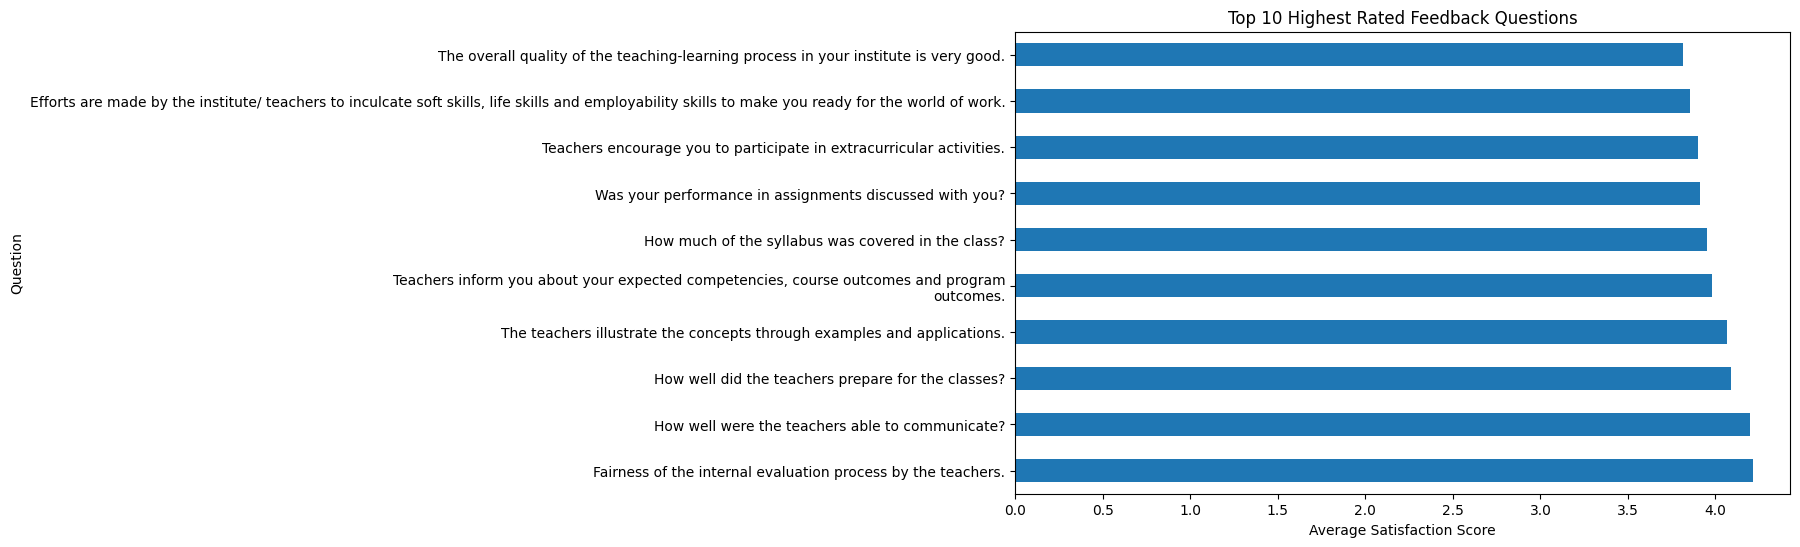

In [8]:
plt.figure(figsize=(10,6))
question_score.head(10).plot(kind='barh')
plt.title("Top 10 Highest Rated Feedback Questions")
plt.xlabel("Average Satisfaction Score")
plt.ylabel("Question")
plt.show()

In [9]:
course_score = (
    df.groupby('Course Name')['Satisfaction_Score']
    .mean()
    .sort_values(ascending=False)
)

course_score.head(10)

,Satisfaction_Score
Course Name,
FYBA,4.550000
MSC ANALYTICAL CHEMISTRY SEM I,4.525000
TYBSC,4.522222
MSC INFORMATION TECHNOLOGY - 1,4.500000
SYBMS,4.357143
FY BCOM (BANKING & INSURANCE),4.350000
M.SC PART - 2 COMPUTER SCIENCE,4.228571
MSC INFORMATION TECHNOLOGY - 3,4.208333
S.Y.B.A.F,4.132609


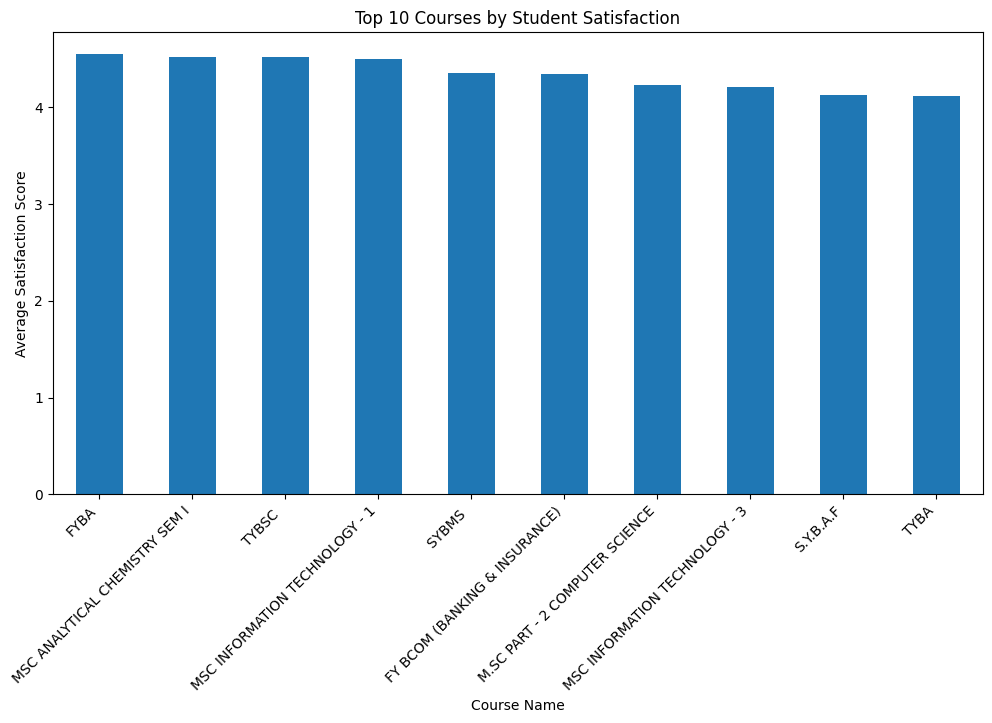

In [10]:
plt.figure(figsize=(12,6))
course_score.head(10).plot(kind='bar')
plt.title("Top 10 Courses by Student Satisfaction")
plt.ylabel("Average Satisfaction Score")
plt.xlabel("Course Name")
plt.xticks(rotation=45, ha='right')
plt.show()

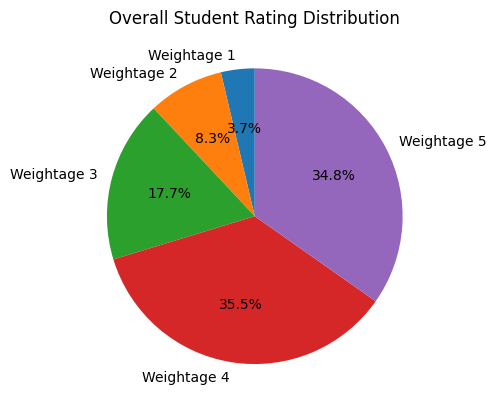

In [11]:
weightage_cols = [
    'Weightage 1',
    'Weightage 2',
    'Weightage 3',
    'Weightage 4',
    'Weightage 5'
]

df[weightage_cols].sum().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Overall Student Rating Distribution")
plt.ylabel("")
plt.show()

In [12]:
basic_course_score = (
    df.groupby('Basic Course')['Satisfaction_Score']
    .mean()
    .sort_values(ascending=False)
)

basic_course_score

,Satisfaction_Score
Basic Course,
MSC INFORMATION TECHNOLOGY,4.354167
BACHELOR OF COMMERCE (BANKING AND INSURANCE),4.350000
BACHELOR OF ARTS,4.335294
BACHELOR OF MANAGEMENT STUDIES,4.092125
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE),4.076102
MSC ANALYTICAL CHEMISTRY,4.033929
MSC ORGANIC CHEMISTRY,3.973529
BACHELOR OF SCIENCE,3.852050
MSC COMPUTER SCIENCE,3.845536


## 📊 Key Insights

- Majority of students gave ratings between 4 and 5, indicating high satisfaction.
- Certain feedback questions consistently scored lower, highlighting areas for improvement.
- Some courses show higher satisfaction compared to others.
- Overall feedback participation is strong across departments.


## ✅ Recommendations

- Focus improvement efforts on low-scoring feedback questions.
- Share best practices from high-performing courses with other departments.
- Conduct follow-up surveys for courses with lower satisfaction.
- Use digital feedback tools for continuous monitoring of student experience.
